<a href="https://www.kaggle.com/code/bharathraam1691/mushroom-dataset?scriptVersionId=91692052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
mush1=pd.read_csv('../input/mushroom-classification/mushrooms.csv')

In [4]:
mush1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mush1.shape

(8124, 23)

In [6]:
mush1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
mush1.duplicated(mush1.columns).sum()

0

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
mush_cols=mush1.columns
mush_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
mush1.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [11]:
for i in mush_cols:
    print(i,mush1[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [12]:
mush2=mush1.copy()
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in mush_cols:
    mush2[i]=le.fit_transform(mush2[i])

In [13]:
mush2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


<AxesSubplot:>

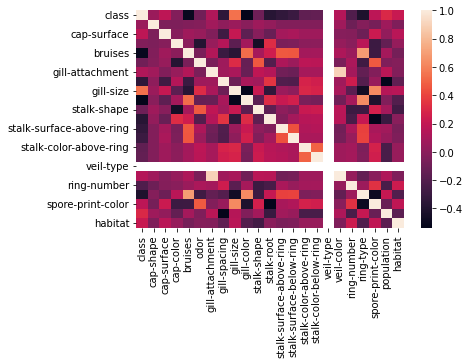

In [14]:
sns.heatmap(mush2.corr())

In [15]:
mush_cols

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='veil-color'>

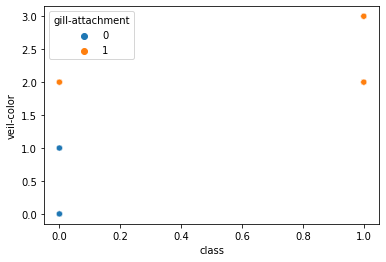

In [16]:
sns.scatterplot(x='class',hue='gill-attachment',y='veil-color',data=mush2)

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

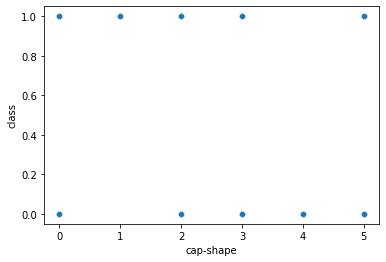

In [17]:
sns.scatterplot(x='cap-shape',y='class',data=mush2)

<AxesSubplot:xlabel='cap-surface', ylabel='class'>

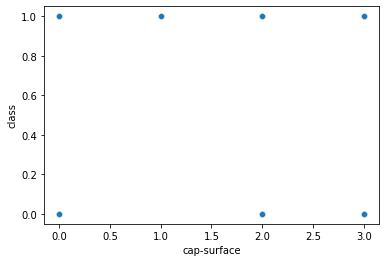

In [18]:
sns.scatterplot(x='cap-surface',y='class',data=mush2)

<AxesSubplot:xlabel='odor', ylabel='class'>

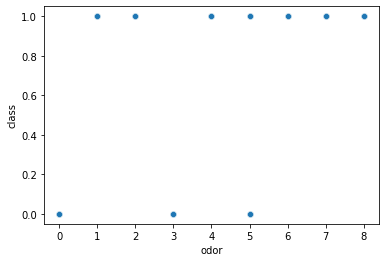

In [19]:
sns.scatterplot(x='odor',y='class',data=mush2)

In [20]:
mush2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [21]:
X=mush2.drop(['class','veil-type'],axis=1)
y=mush2['class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


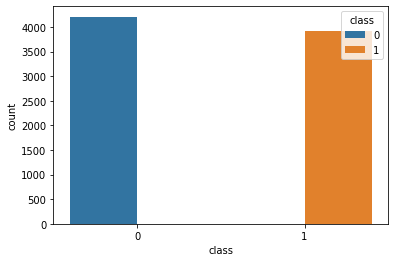

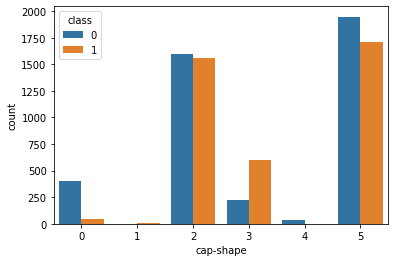

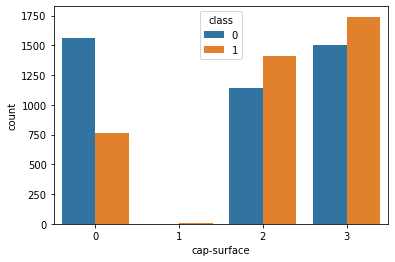

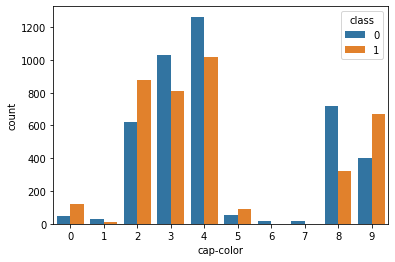

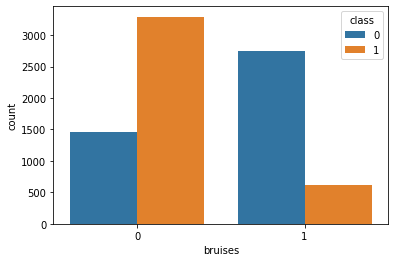

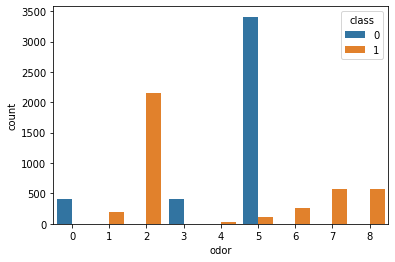

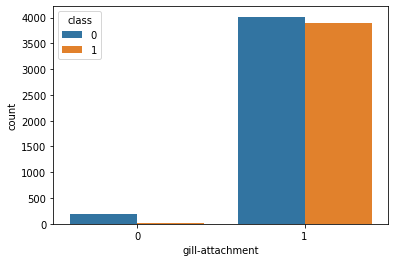

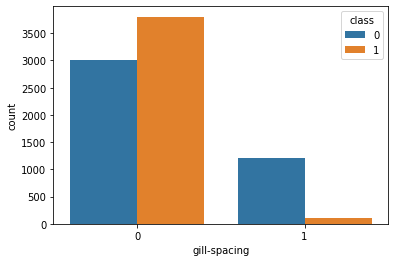

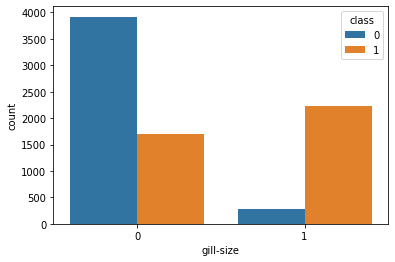

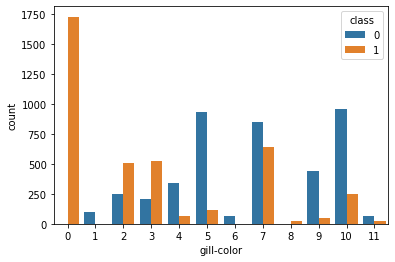

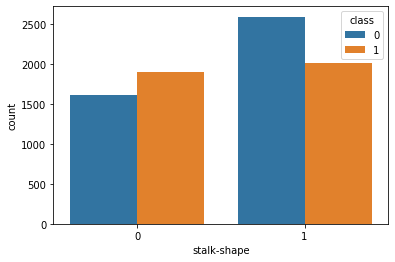

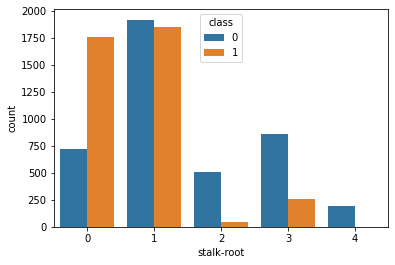

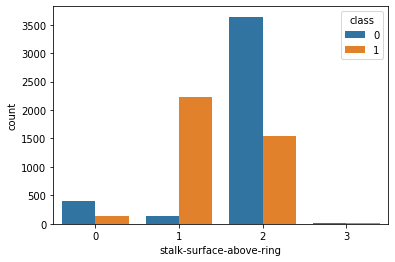

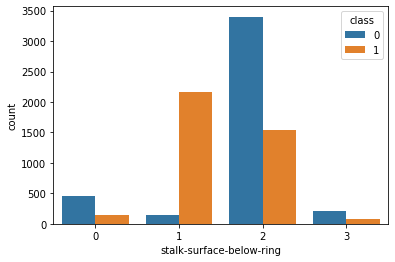

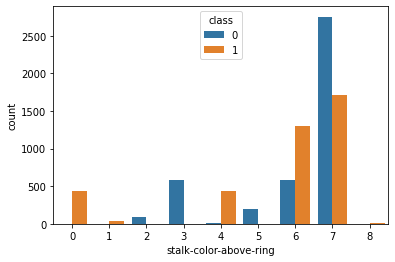

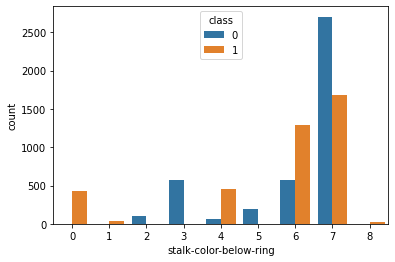

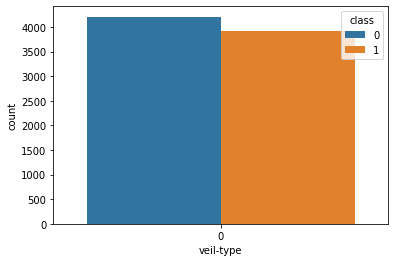

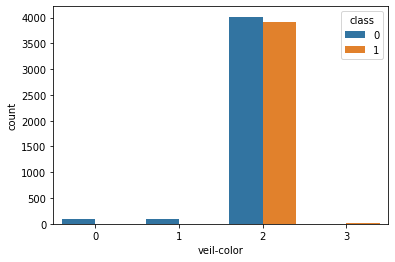

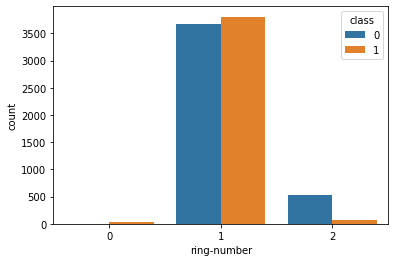

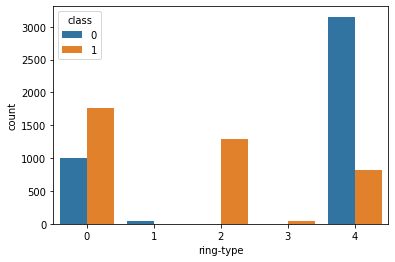

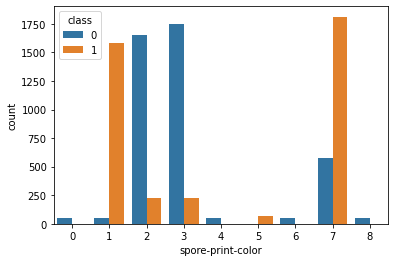

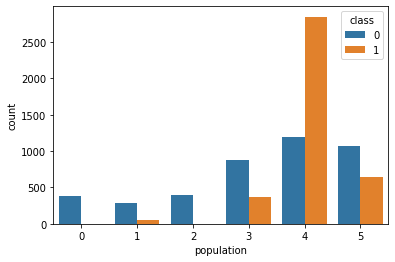

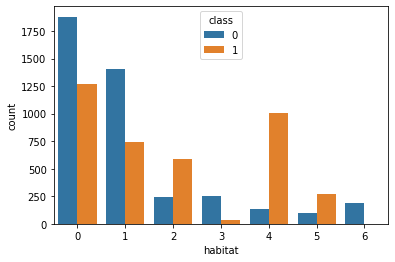

In [23]:
for i in mush_cols:
    plt.figure()
    sns.countplot(x=i,hue='class',data=mush2)

In [24]:
def train_model(algo_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    avg_accuracy = cross_val_score(model, X_train, y_train, scoring ='accuracy', cv = 5).mean()
    avg_precision = cross_val_score(model, X_train, y_train, scoring ='average_precision', cv = 5).mean()
    avg_recall = cross_val_score(model, X_train, y_train, scoring ='recall', cv = 5).mean()
    avg_f1 = cross_val_score(model, X_train, y_train, scoring ='f1', cv = 5).mean()
    avg_roc_auc = cross_val_score(model, X_train, y_train, scoring ='roc_auc', cv = 5).mean()
    
    train_model_results = pd.DataFrame({
        'Algorithm':["{}".format(algo_name)],
        'CV Accuracy':[avg_accuracy],
        'CV Precision':[avg_precision],
        'CV Recall':[avg_recall],
        'CV F1':[avg_f1],
        'CV ROC AUC': [avg_roc_auc]
    })
    
    return train_model_results

untuned_log = train_model(algo_name = 'Untuned Log', model = LogisticRegression(solver='liblinear') , X_train = X_train, y_train = y_train)
untuned_svc = train_model(algo_name = 'Untuned Svc', model = SVC() , X_train = X_train, y_train = y_train)
untuned_gnb= train_model(algo_name = 'Untuned Gnb', model = GaussianNB() , X_train = X_train, y_train = y_train)

In [25]:
ans=pd.concat([untuned_log,untuned_svc,untuned_gnb],axis=0)

In [26]:
ans

,Algorithm,CV Accuracy,CV Precision,CV Recall,CV F1,CV ROC AUC
0,Untuned Log,0.950394,0.971538,0.937998,0.947726,0.979626
0,Untuned Svc,0.986405,0.999808,0.973593,0.985644,0.999824
0,Untuned Gnb,0.926511,0.962189,0.913883,0.922803,0.950509
